## Analyizing Tweets with #OOTT. Organization of Oil Trading Tweeters (Twitter community)

In [2]:
#!pip install tweepy

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import time
from datetime import datetime
from IPython.display import clear_output
import pickle

## Project 4 - Tokenization and Lemmization (Tweets)

In [2]:
with open('proj4_tweet.pickle','rb') as read_file:
    df_tweets_old = pickle.load(read_file)

In [3]:
with open('proj4_tweet_2.pickle','rb') as read_file:
    df_tweets_new = pickle.load(read_file)

In [4]:
df_tweets = pd.concat([df_tweets_old, df_tweets_new], ignore_index=True)

In [5]:
df_tweets.shape

(234368, 22)

#### Make sure the tweets are unique, remove the duplicates and already filtered for retweets

In [6]:
df_tweets = df_tweets.drop_duplicates(subset=['text'], keep='first')

#### Keep those that are in English

In [7]:
df_tweets = df_tweets.drop(df_tweets.index[df_tweets.lang != 'en'])

#### Filter for twitter bots and make sure they are actual humans

In [8]:
df_tweets = df_tweets.drop(df_tweets.index[df_tweets.screen_name.isin(['oilbot123','RealDavidJensen','countrycityboy2'])])
df_tweets = df_tweets[~df_tweets.text.str.contains("gann")]
df_tweets = df_tweets.drop(df_tweets.index[df_tweets.friends < 10])
df_tweets = df_tweets.drop(df_tweets.index[df_tweets.followers < 50])

In [9]:
df_tweets.shape

(6524, 22)

In [10]:
df_tweets.head(5)

,about,coord,created,fav_by,favs,followers,friends,hashtags,lang,origin,...,rt_by,rt_count,screen_name,text,tweet_id,urls,user_id,user_loc,user_name,v
1,39 years in oil and gas trading and marketing....,None,2019-05-17 16:54:08,False,1,1275,64,"[{'text': 'OOTT', 'indices': [64, 69]}, {'text...",en,2016-08-16 15:46:53,...,False,0,SpotMonthEnergy,Playing poker well can make you a profitable o...,1129429909028388865,{'description': {'urls': []}},765575568041451521,"Texas, USA",Randy Brown,False
2,🛢️Oil Trading/downstream & upstream industry p...,None,2019-05-17 16:51:47,False,0,317,973,"[{'text': 'OOTT', 'indices': [0, 5]}, {'text':...",en,2015-06-15 11:22:30,...,False,0,IgorAn9,#OOTT #Oil_Quality_Matters #Russia Bad oil sti...,1129429315156885506,{'description': {'urls': []}},3326754629,"Dubai, United Arab Emirates",Igor_Afonin,False
4,"News,Economics,Politics. My views range many t...",None,2019-05-17 16:48:35,False,0,356,828,"[{'text': 'OOTT', 'indices': [96, 101]}]",en,2012-11-16 23:03:07,...,False,0,Steel94010,We are running with an insurance adjuster for ...,1129428510261612544,{'description': {'urls': []}},952560770,not your business,Gabriel Steel,False
5,ｅｎｅｒｇｙ ｓｅｃｔｏｒ ｎｅｗｓ #OOTT,None,2019-05-17 16:46:10,False,0,2084,2908,"[{'text': 'OOTT', 'indices': [0, 5]}]",en,2015-04-12 04:30:58,...,False,0,carbonreports,"#OOTT Eyeing Iran, U.S. official says all alle...",1129427903064813568,{'description': {'urls': []}},3158356283,United States,HYDROCARBON,False
6,"Energy editor, Reuters U.S., all things oil an...",None,2019-05-17 16:45:16,False,0,11763,1363,"[{'text': 'OOTT', 'indices': [64, 69]}]",en,2010-06-21 18:05:06,...,False,0,davidgaffen,"avg monthly imports from US of our crude oil, ...",1129427678157778946,{'url': {'urls': [{'url': 'https://t.co/EpwGhr...,158070493,New York,David Gaffen,True


In [11]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from preprocessor.api import clean

#### Get rid of the URL and hashtag, preprocessing cleaning

In [12]:
text = 'Playing poker well can make you a profitable oil and gas person #OOTT #natgas https://t.co/XyD7wSCQ2G https://t.co/QSNzZpSIh5'
print(text) 
clean_text = text.replace('#','')
clean_text = clean(clean_text)
clean_text = alphanumeric(clean_text)
clean_text = punc_lower(clean_text)
print(clean_text)

Playing poker well can make you a profitable oil and gas person #OOTT #natgas https://t.co/XyD7wSCQ2G https://t.co/QSNzZpSIh5


NameError: name 'alphanumeric' is not defined

In [15]:
# Text preprocessing steps - remove numbers, capital letters and punctuations
remove_hash =  lambda x: x.replace('#','')
pre_clean = lambda x: clean(x)
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())


df_tweets['text'] = df_tweets.text.map(pre_clean).map(alphanumeric).map(punc_lower)
print(df_tweets.iloc[0].text)
test_tweet = df_tweets.iloc[0].text

playing poker well can make you a profitable oil and gas person


In [16]:
df_tweets = df_tweets.drop_duplicates(subset=['text'], keep='first')

In [17]:
df_tweets.shape

(5898, 22)

In [18]:
print(df_tweets.text[-5:])

200894    oil trading lower post these events  iran waiv...
200895    con edison limits natural gas service due to p...
200896    geopolitical risks  amp  china trade dispute c...
200897    dow jones  us  amp  uk crude oil  silver price...
200899    best practices for design and operation of wit...
Name: text, dtype: object


In [19]:
def lemma(text):
    lemma = nltk.wordnet.WordNetLemmatizer()
    return lemma.lemmatize(text, pos='v')

In [20]:
tokenizer=TreebankWordTokenizer()

In [21]:
def token_lem(text):
    tokenizer=TreebankWordTokenizer()
    return [lemma(x) for x in tokenizer.tokenize(text)]

In [23]:
df_tweets['text'] = df_tweets.text.apply(token_lem)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

#### Join word back together so it can passed to CountVectorizer

In [25]:
df_tweets['text'] = df_tweets.text.apply(lambda x: ' '.join(x))

#### Vectorize Tweets and Adding my own stop words to the list

In [26]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [27]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["oil","oott","petroleum",'energy','crude','cl','today', 'mmb', 'natural', 'mb', 'opec', 'gas',\
                                               'market','price','wti','brent','amp','week','gann','uso', 'natgas', 'dwt', 'crudeoil',\
                                               'es', 'uwt', 'spx', 'erl', 'djia', 'ndx','lng','padd', 'spy', 'vix', 'nq', 'futures', 'oiltrading']) 

In [28]:
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words=my_stop_words, min_df = 5, max_df = .7)

In [29]:
df_countvectorize = vectorizer.fit_transform(df_tweets.text)

In [30]:
type(df_countvectorize)

scipy.sparse.csr.csr_matrix

In [31]:
df_countvectorize.shape

(5898, 2843)

##### Try using TF-IDF Vectorizer

In [32]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words=my_stop_words, min_df = 5, max_df = .7)

In [33]:
df_tfidfvectorize = tfidf_vectorizer.fit_transform(df_tweets.text)

In [34]:
df_tfidfvectorize.shape

(5898, 2843)

#### Converting sparse matrix to dataframe just to visualize the first 5 rows

In [35]:
df_wordcloud = pd.DataFrame(df_countvectorize.toarray(), index=df_tweets['text'], columns=vectorizer.get_feature_names())

In [36]:
df_wordcloud.head(2)

,aapl,ability,able,absolutely,abundance,accelerate,access,accord,account,accusation,...,ym rty,ym rty gc,york,yoy,yr,yrs,zarif,zen,zero,zone
text,,,,,,,,,,,,,,,,,,,,,
play poker well can make you a profitable oil and gas person,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bad oil still pain total be make refinery health test in germany,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_wordcloud_tableau = df_wordcloud.sum(axis=0).sort_values(ascending=False).head(150)

In [38]:
# df to csv for Tableau Visualization
df_wordcloud_tableau.to_csv('wordcloud.csv', sep=',')

/Users/robfang29/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


## Topic Modeling with Matrix Factorization

In [39]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

#### Latent Semantic Analysis (LSA) using Singular Value Decomposition (SVD)

In [40]:
lsa = TruncatedSVD(4)
tweet_topics = lsa.fit_transform(df_countvectorize)
lsa.explained_variance_ratio_

array([0.01588612, 0.0102298 , 0.00972806, 0.00861211])

In [41]:
print("Explained Variance of the LSA: {}%".format(int(lsa.explained_variance_ratio_.sum()*100)))

Explained Variance of the LSA: 4%


In [42]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [43]:
display_topics(lsa, vectorizer.get_feature_names(), 8)


Topic  0
saudi, attack, say, arabia, saudi arabia, iran, production, minister

Topic  1
production, trade, china, demand, supply, increase, war, iran

Topic  2
production, say, increase, cut, bpd, production cut, minister, inventory

Topic  3
say, iran, minister, meet, deal, iraq, falih, minister say


#### Change df option to display the max width of a column

In [44]:
pd.option_context('display.max_colwidth', -1)

In [45]:
topic_matrix = pd.DataFrame(tweet_topics.round(5),
             index = df_tweets['text'],
             columns = ["Saudi_news","China_trade","energy_stats","Iran_news"])
topic_matrix.sort_values(by = 'China_trade', ascending = False).head(10)

,Saudi_news,China_trade,energy_stats,Iran_news
text,,,,
revise down oil demand growth estimate by bpd to mln bpd global oil supply in april fell bpd with canada kazakh azerbaijan and iran lead losses predict non opec supply in will grow mln bpd vs mln bpd last year,1.02495,2.03837,0.97185,-0.73705
us china trade war stats yr of us import from china tax at pc of total yr of china ’ s import from the us tax at of total crude erts be still exempt but erts to china hit by pc tax,0.65004,2.01366,-2.45582,-0.23536
say drive u s production growth uae crude production in may be mb d incredible production growth only in between equal to uae ’ s current total production and permian will add another uae production between,1.30039,1.96868,2.59417,-0.09073
can we all agree to not trade off weekly eia api data and just react to headline like demand concern due to trade war or supply concern give venezuela or shale production peak in xx,0.77510,1.94782,-1.13483,-0.30376
u s total oil products supply last week period average mln bpd vs year ago period average mln bpd vs yr ago average mln bpd vs yr ago fuel be vs year ago,0.66118,1.92772,1.22180,-1.62105
great to speak to about oil market increase middle east instability iran venezuela sanction impact china us trade war impact on global economy amp oil demand always an interest discussion and sometimes also funny,0.88057,1.70519,-1.60551,-0.24608
oil update on track for biggest weekly gain since early april yet trade weaker on the day due to u s china trade war concern and how it will impact demand,0.54920,1.63059,-2.20521,-0.06971
this together with drop in iran production erts as well as uncertainty about libyan crude erts will make opec s ability to drop the production cut agreement harder and harder supply risk continue to build,0.91790,1.60323,1.11313,-0.20303
oil be head for its biggest drop in two weeks as the worsen u s china trade war overshadow the prospect of opec extend crude production cut,0.51224,1.48484,-0.88470,-0.07373


#### Cosine similarity

In [46]:
cosine_similarity((topic_matrix.iloc[0], topic_matrix.iloc[500])).round()

array([[1., 1.],
       [1., 1.]])

In [47]:
topic_matrix.iloc[0]

Saudi_news      0.03531
China_trade     0.04910
energy_stats    0.00302
Iran_news       0.00431
Name: play poker well can make you a profitable oil and gas person, dtype: float64

In [48]:
topic_matrix.iloc[500]

Saudi_news      0.02801
China_trade     0.03164
energy_stats   -0.00973
Iran_news       0.01820
Name: know for the highly politicise nature of relations between the participants and their ability to l…, dtype: float64

#### Non-Negative Matrix Factorization (NMF)

In [49]:
nmf_model = NMF(4)
nmf_topic = nmf_model.fit_transform(df_countvectorize)

In [50]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
saudi, attack, arabia, saudi arabia, tankers, pipeline, drone, pump, station, pump station

Topic  1
production, increase, supply, year, demand, cut, month, bpd, rise, inventory

Topic  2
trade, china, war, trade war, china trade, tensions, talk, china trade war, tariff, deal

Topic  3
say, iran, minister, meet, iraq, falih, deal, al, sanction, iranian


In [51]:
nmf_topic[3]

array([0.        , 0.        , 0.00073831, 0.29286849])

In [52]:
topic_matrix = pd.DataFrame(nmf_topic.round(5),
             index = df_tweets['text'],
             columns = ["saudi_attack","energy_stats","trade_war","iran_sanction"])
topic_matrix.sort_values(by = 'energy_stats', ascending = False).head(10)

,saudi_attack,energy_stats,trade_war,iran_sanction
text,,,,
say drive u s production growth uae crude production in may be mb d incredible production growth only in between equal to uae ’ s current total production and permian will add another uae production between,0.0000,0.59810,0.00000,0.14801
u s total oil products supply last week period average mln bpd vs year ago period average mln bpd vs yr ago average mln bpd vs yr ago fuel be vs year ago,0.0000,0.53519,0.00000,0.00000
revise down oil demand growth estimate by bpd to mln bpd global oil supply in april fell bpd with canada kazakh azerbaijan and iran lead losses predict non opec supply in will grow mln bpd vs mln bpd last year,0.0000,0.49032,0.00000,0.06127
crude oil production re benchmarking notice this week ’ s domestic crude oil production estimate incorporate a re benchmarking that affect estimate volumes by less than barrel per day which be about of this week ’ s estimate production total eia,0.0000,0.42042,0.00000,0.00000
happen now nobody speak against roll over production cut russians will wait until june to ask to ease oil cut consensus build on extend production cut until end bbg,0.0000,0.40877,0.00000,0.00235
saudi energy minister if a decision be issue in june to extend the oil cut saudi arabia will remain within these production limit oil production in june and may be eected to reach million bpd sanction on iran come at a time when the market be well supply,0.2881,0.39964,0.00000,0.11648
this together with drop in iran production erts as well as uncertainty about libyan crude erts will make opec s ability to drop the production cut agreement harder and harder supply risk continue to build,0.0000,0.39628,0.00485,0.06840
eia oil data u s crude oil import average mln bpd last week bpd vs previous week last weeks oil import average mln bpd vs year ago,0.0000,0.37981,0.00000,0.00000
wti crude product net long position fell but open interest increase result in an increase in normalize net long position week end may normalize net long position be less than in,0.0000,0.35183,0.00000,0.00000


#### For clustering purposes lets try with 15 topics

In [53]:
nmf_model_2 = NMF(15)
nmf_topic_15 = nmf_model_2.fit_transform(df_countvectorize)

In [54]:
display_topics(nmf_model_2, vectorizer.get_feature_names(), 10)


Topic  0
saudi, arabia, saudi arabia, minister, saudi minister, arabia say, saudi arabia say, al, attack saudi, falih

Topic  1
month, barrel, inventory, stock, rise, gasoline, million, year, import, low

Topic  2
trade, china, war, trade war, china trade, talk, china trade war, tariff, deal, like

Topic  3
say, minister, falih, meet, minister say, iraq, falih say, al, al falih, russia

Topic  4
production, cut, production cut, increase, meet, permian, june, growth, russia, time

Topic  5
xle, uco, bno, bno xle, dbo bno xle, dbo bno, dbo, uco dbo, uco dbo bno, change

Topic  6
pipeline, attack, pump, drone, station, pump station, drone attack, aramco, west, east west

Topic  7
long, increase, net, position, net long, long position, net long position, end, normalize, decrease

Topic  8
iran, sanction, erts, trump, iranian, deal, war, nuclear, venezuela, think

Topic  9
east, middle, middle east, tensions, global, middle east tensions, east tensions, rise, higher, away

Topic  10
stay, 

In [55]:
topic_matrix_2 = pd.DataFrame(nmf_topic_15.round(5),
             index = df_tweets['text'])
topic_matrix_2.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
text,,,,,,,,,,,,,,,
play poker well can make you a profitable oil and gas person,0.00076,0.00443,0.00193,0.00076,0.00502,0.00038,0.00130,0.00017,0.00821,0.00000,0.00076,0.0000,0.00025,0.00000,0.00458
bad oil still pain total be make refinery health test in germany,0.00000,0.03623,0.00201,0.00431,0.00557,0.00000,0.00067,0.00000,0.00247,0.00000,0.00000,0.0000,0.00000,0.00737,0.00356
we be run with an insurance adjuster for our intelligence assessment on the tanker attack,0.00000,0.00000,0.00000,0.00000,0.00000,0.01276,0.01577,0.00000,0.00097,0.00041,0.00000,0.2284,0.00000,0.00000,0.00000
eye iran u s official say all allege sanction breach take seriously,0.00000,0.00000,0.00000,0.20798,0.00000,0.00000,0.00000,0.00000,0.22750,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
avg monthly import from us of our crude oil last mos bpd canada k south korea k …,0.00140,0.02569,0.00401,0.00000,0.00000,0.00000,0.00000,0.00253,0.00000,0.00185,0.00000,0.0000,0.00000,0.11152,0.00062


#### LDA (Latent Dirichlet Allocation) Model in gensim

In [56]:
# gensim
from gensim import corpora, models, similarities, matutils

# sklearn
from sklearn import datasets

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

##### convert to gensim 

In [57]:
vectorizer.fit(df_tweets.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.7, max_features=None, min_df=5,
        ngram_range=(1, 3), preprocessor=None,
        stop_words=frozenset({'should', 'then', 'always', 'i', 'hundred', 'him', 'week', 'fifty', 'anyhow', 'much', 'interest', 'are', 'anything', 'empty', 'now', 'thin', 'enough', 'whether', 'eleven', 'every', 'but', 'neither', 'con', 'each', 'natural', 'am', 'everyone', 'hereafter', 'rather', 'afterwards'...', 'ever', 'same', 'twenty', 'yet', 'latter', 'via', 'wherever', 'alone', 'hasnt', 'no', 'fifteen'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [58]:
lda_doc = vectorizer.transform(df_tweets.text).transpose()

In [59]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(lda_doc)

##### Map matrix rows to words (tokens)¶

In [60]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [61]:
len(id2word)

2843

In [62]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=5)

2019-06-26 09:53:52,509 : INFO : using symmetric alpha at 0.25
2019-06-26 09:53:52,510 : INFO : using symmetric eta at 0.25
2019-06-26 09:53:52,512 : INFO : using serial LDA version on this node
2019-06-26 09:53:52,517 : INFO : running online (multi-pass) LDA training, 4 topics, 5 passes over the supplied corpus of 5898 documents, updating model once every 2000 documents, evaluating perplexity every 5898 documents, iterating 50x with a convergence threshold of 0.001000
2019-06-26 09:53:52,524 : INFO : PROGRESS: pass 0, at document #2000/5898
2019-06-26 09:53:53,289 : INFO : merging changes from 2000 documents into a model of 5898 documents
2019-06-26 09:53:53,292 : INFO : topic #0 (0.250): 0.009*"production" + 0.009*"attack" + 0.008*"supply" + 0.007*"barrel" + 0.007*"year" + 0.006*"saudi" + 0.006*"east" + 0.006*"global" + 0.006*"rise" + 0.006*"middle"
2019-06-26 09:53:53,294 : INFO : topic #1 (0.250): 0.011*"iran" + 0.011*"saudi" + 0.010*"say" + 0.010*"attack" + 0.007*"tankers" + 0.006

In [63]:
lda.print_topics(num_words=7)

2019-06-26 09:54:03,056 : INFO : topic #0 (0.250): 0.012*"year" + 0.012*"production" + 0.010*"rise" + 0.009*"barrel" + 0.009*"supply" + 0.009*"stay" + 0.009*"checkout"
2019-06-26 09:54:03,057 : INFO : topic #1 (0.250): 0.020*"saudi" + 0.017*"attack" + 0.016*"iran" + 0.014*"say" + 0.009*"tankers" + 0.008*"al" + 0.007*"arabia"
2019-06-26 09:54:03,058 : INFO : topic #2 (0.250): 0.016*"saudi" + 0.013*"say" + 0.012*"increase" + 0.008*"attack" + 0.008*"long" + 0.007*"june" + 0.007*"minister"
2019-06-26 09:54:03,059 : INFO : topic #3 (0.250): 0.020*"trade" + 0.012*"china" + 0.010*"war" + 0.007*"production" + 0.007*"say" + 0.007*"like" + 0.006*"iran"


[(0,
  '0.012*"year" + 0.012*"production" + 0.010*"rise" + 0.009*"barrel" + 0.009*"supply" + 0.009*"stay" + 0.009*"checkout"'),
 (1,
  '0.020*"saudi" + 0.017*"attack" + 0.016*"iran" + 0.014*"say" + 0.009*"tankers" + 0.008*"al" + 0.007*"arabia"'),
 (2,
  '0.016*"saudi" + 0.013*"say" + 0.012*"increase" + 0.008*"attack" + 0.008*"long" + 0.007*"june" + 0.007*"minister"'),
 (3,
  '0.020*"trade" + 0.012*"china" + 0.010*"war" + 0.007*"production" + 0.007*"say" + 0.007*"like" + 0.006*"iran"')]

##### Not quite as interpretable as NMF or LSA

#### Visualization for LDA

In [597]:
#!pip install pyLDAvis

In [620]:
# import pyLDAvis
# import pyLDAvis.gensim
# vis = pyLDAvis.gensim.prepare(topic_model=lda, corpus=corpus, dictionary=id2word)

## Clustering Using tSNE for Visualization

In [64]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [65]:
topic_matrix.head()

,saudi_attack,energy_stats,trade_war,iran_sanction
text,,,,
play poker well can make you a profitable oil and gas person,0.00069,0.00863,0.00330,0.00366
bad oil still pain total be make refinery health test in germany,0.00000,0.03515,0.00518,0.00379
we be run with an insurance adjuster for our intelligence assessment on the tanker attack,0.08397,0.00020,0.00215,0.00000
eye iran u s official say all allege sanction breach take seriously,0.00000,0.00000,0.00074,0.29287
avg monthly import from us of our crude oil last mos bpd canada k south korea k …,0.00000,0.05633,0.00560,0.00000


#### Assign topic id for each tweet

In [66]:
topic_matrix.loc[topic_matrix['saudi_attack'] == topic_matrix.max(axis=1), 'topic_id'] =  0

In [67]:
topic_matrix.loc[topic_matrix['energy_stats'] == topic_matrix.max(axis=1), 'topic_id'] =  1

In [68]:
topic_matrix.loc[topic_matrix['trade_war'] == topic_matrix.max(axis=1), 'topic_id'] =  2

In [69]:
topic_matrix.loc[topic_matrix['iran_sanction'] == topic_matrix.max(axis=1), 'topic_id'] =  3

In [70]:
topic_matrix.head()

,saudi_attack,energy_stats,trade_war,iran_sanction,topic_id
text,,,,,
play poker well can make you a profitable oil and gas person,0.00069,0.00863,0.00330,0.00366,1.0
bad oil still pain total be make refinery health test in germany,0.00000,0.03515,0.00518,0.00379,1.0
we be run with an insurance adjuster for our intelligence assessment on the tanker attack,0.08397,0.00020,0.00215,0.00000,0.0
eye iran u s official say all allege sanction breach take seriously,0.00000,0.00000,0.00074,0.29287,3.0
avg monthly import from us of our crude oil last mos bpd canada k south korea k …,0.00000,0.05633,0.00560,0.00000,1.0


In [71]:
topic_matrix.groupby('topic_id')['saudi_attack'].count()

topic_id
0.0     680
1.0    3017
2.0    1232
3.0     969
Name: saudi_attack, dtype: int64

In [72]:
target = topic_matrix['topic_id']
target_names = topic_matrix.columns[0:4]
colors = ['r','g','b','c']
target_ids = range(len(target_names))
X = nmf_topic

In [73]:
model = TSNE(n_components=2, random_state=0,verbose=0)
tsne_data = model.fit_transform(X)

/Users/robfang29/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


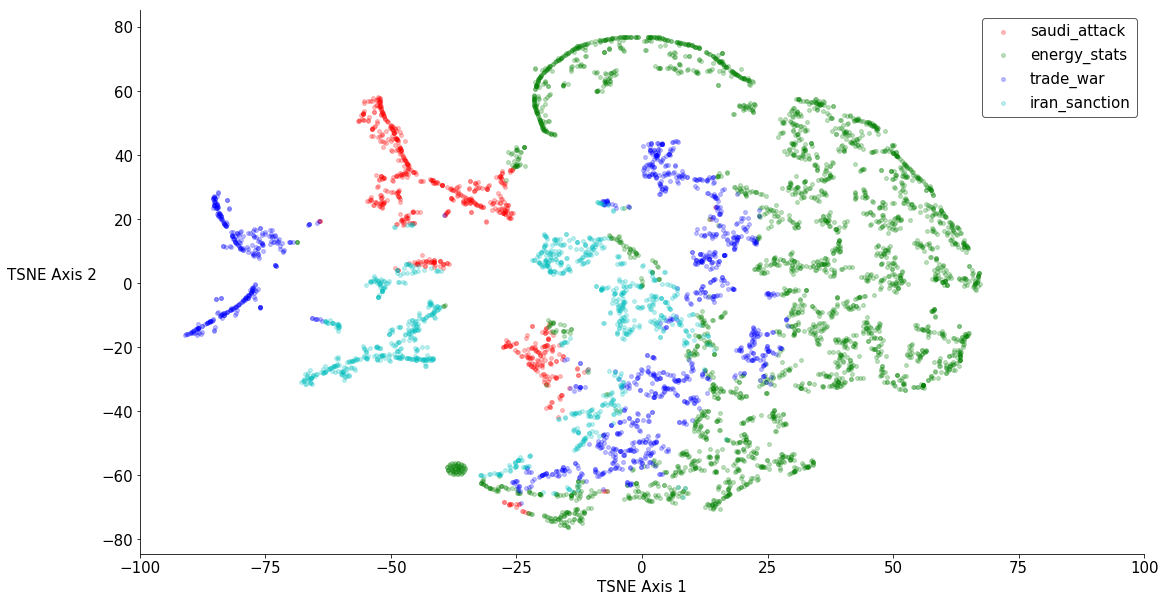

In [74]:
colorize = []

fig, ax = plt.subplots(figsize=(18, 10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i, c, label in zip(target_ids, colors, target_names):
        ax = plt.scatter(tsne_data[target == i, 0], tsne_data[target == i, 1], c=c, label=label, s=15, alpha=.25)


plt.legend(fontsize=15, loc='bottom right', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);
#plt.title("Topic Clusters with tSNE", fontsize=20)
plt.ylabel("TSNE Axis 2", fontsize=15, rotation='horizontal', ha='right')
plt.xlabel("TSNE Axis 1", fontsize=15);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);


## Word Count Visualization

In [75]:
import seaborn as sns

In [76]:
result = df_wordcloud.copy()

In [77]:
result['topic'] = topic_matrix['topic_id']

In [78]:
topic_1 = pd.DataFrame(result[result['topic']==0].sum(axis=0).sort_values(ascending=False).head(10))

In [79]:
topic_1.columns=['count']

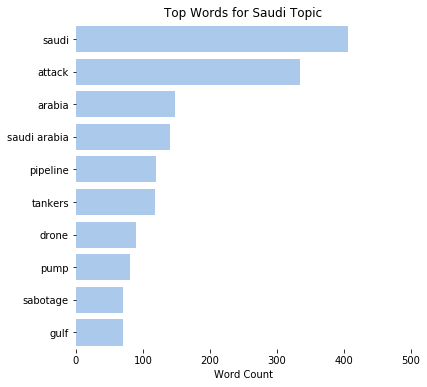

In [80]:
plt.subplots(figsize=(6, 6))
sns.set_color_codes("pastel")
plot_1 = sns.barplot(x='count', y=topic_1.index, data=topic_1, color="b")
plot_1.set(xlim=(0, 500), ylabel="",
       xlabel="Word Count")
sns.despine(left=True, bottom=True)
plt.title('Top Words for Saudi Topic');

In [81]:
topic_2 = pd.DataFrame(result[result['topic']==2].sum(axis=0).sort_values(ascending=False).head(10))

In [82]:
topic_2.columns=['count']

In [83]:
topic_2 = topic_2.drop('topic')

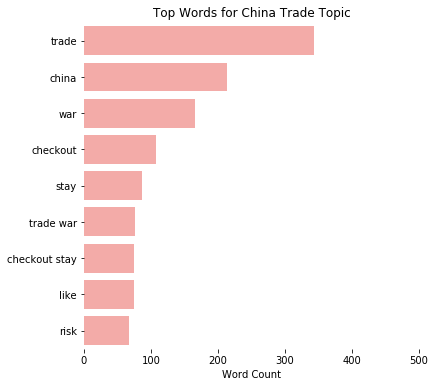

In [84]:
plt.subplots(figsize=(6, 6))
sns.set_color_codes("pastel")
plot_2 = sns.barplot(x='count', y=topic_2.index, data=topic_2, color="r")
plot_2.set(xlim=(0, 500), ylabel="",
       xlabel="Word Count")
sns.despine(left=True, bottom=True)
plt.title('Top Words for China Trade Topic');

## Using PCA for Visualization

In [85]:
from sklearn.decomposition import PCA

In [86]:
#X = df_countvectorize.toarray
X = df_countvectorize

In [87]:
# Take all of the data and plot it on 2 dimensions
pca = TruncatedSVD(n_components=2)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
pca.fit(X)
pca_data = pca.transform(X)

In [88]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend(fontsize=12, loc='upper right', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')

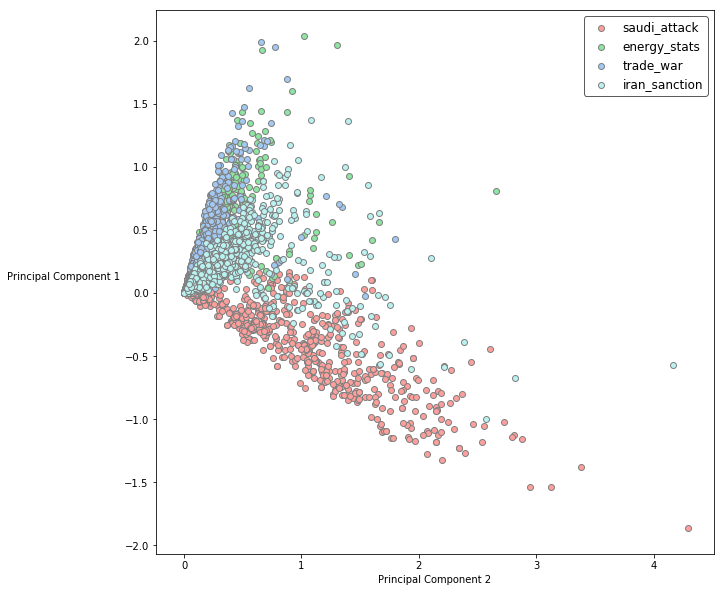

In [89]:
# plot of all the Topics
plot_PCA_2D(pca_data, target=target, target_names=topic_matrix.columns[0:4])
plt.ylabel("Principal Component 1",fontsize=10, rotation='horizontal', ha='right')
plt.xlabel('Principal Component 2',fontsize=10);
#plt.ylim(-0.2,.2);

## Looking at the number of topics using scree plot

In [90]:
pca2 = TruncatedSVD(n_components=15)
pca2.fit(X)
pca_data2 = pca2.transform(X)

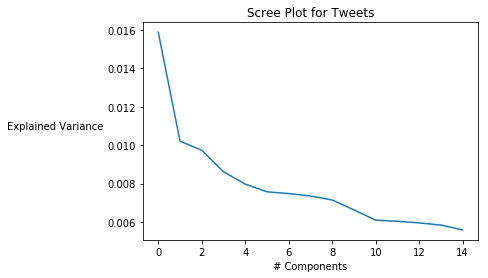

In [91]:
plt.plot(pca2.explained_variance_ratio_)
plt.xlabel('# Components')
plt.ylabel('Explained Variance', rotation='horizontal', ha='right');
plt.title('Scree Plot for Tweets');

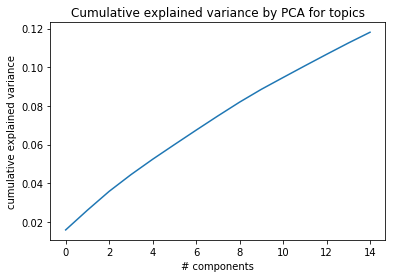

In [92]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for topics');

## Heirarchical Agglomerative Clustering

In [93]:
# nmf_model_viz = NMF(2)
# nmf_data = nmf_model_viz.fit_transform(df_countvectorize)

In [94]:
#X = df_countvectorize.toarray()
X = pca_data

ward : 0.82s
average : 0.77s
complete : 0.78s


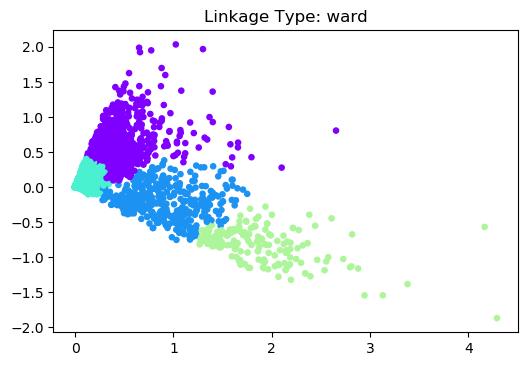

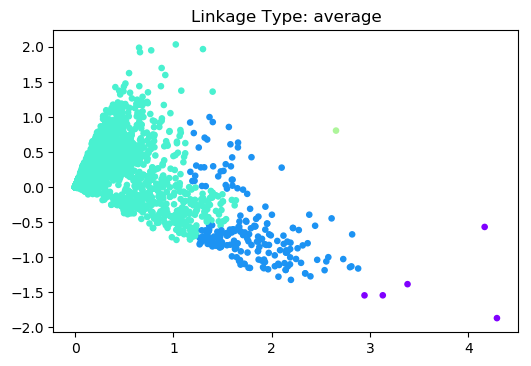

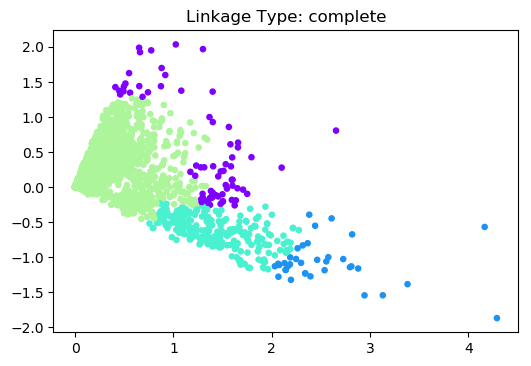

In [95]:
from time import time
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=4)
    t0 = time()
    clustering.fit(X)
    print("%s : %.2fs" % (linkage, time() - t0))
    
    x,y = zip(*X)
    plt.figure(dpi=100)
    plt.scatter(x,y,c=plt.cm.rainbow(clustering.labels_*50),s=14)
    plt.title("Linkage Type: %s" % linkage)

## K-MEANS Clustering

In [96]:
from sklearn.cluster import KMeans

In [97]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    plt.figure(dpi=100)
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

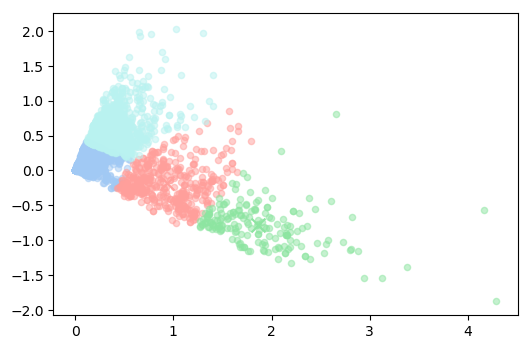

In [98]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

## Meanshift Clustering

In [99]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [100]:
# estimate bandwidth 
bandwidth = estimate_bandwidth(X, quantile=.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 18


<Figure size 432x288 with 0 Axes>

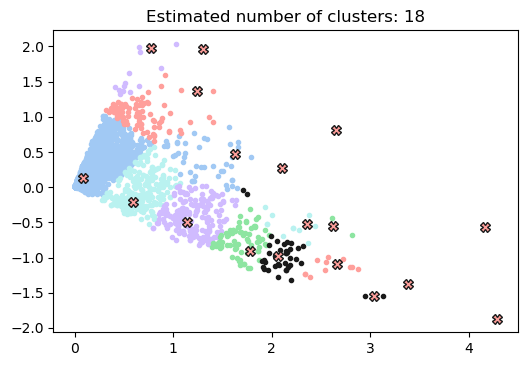

In [101]:
from itertools import cycle

plt.figure(1)
plt.clf()
plt.figure(dpi=100)
colors = cycle('bcmgkr')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1] ,  col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'X', markerfacecolor='r',
             markeredgecolor='k', markersize=7)
plt.title('Estimated number of clusters: %d' % n_clusters_);

## DBSCAN Clustering

In [102]:
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler

In [103]:
# Standardize our data for DBSCAN and fit DBSCAN
db = DBSCAN(eps=.1, min_samples=20).fit(X)

2019-06-26 09:54:54,678 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-26 09:54:54,690 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-26 09:54:54,694 : WARNING : 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-06-26 09:54:54,697 : WARNING : 'c' arg

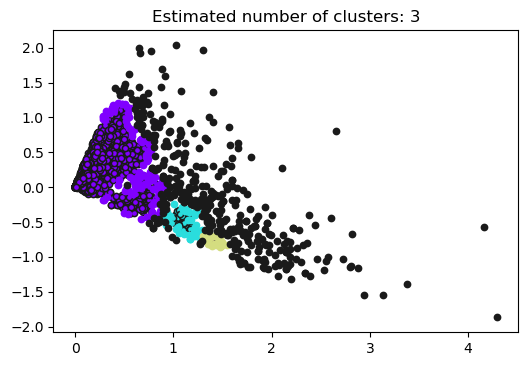

In [104]:
# Let's find the observations DBSCAN called "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=100)
show_core = True
show_non_core = True
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    if show_core:
        xy = X[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1) # add black border for core points
    
    if show_non_core:
        xy = X[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);

## Sentiment Analysis

In [105]:
corpus = df_tweets['text']

In [106]:
corpus.head()

1    play poker well can make you a profitable oil ...
2    bad oil still pain total be make refinery heal...
4    we be run with an insurance adjuster for our i...
5    eye iran u s official say all allege sanction ...
6    avg monthly import from us of our crude oil la...
Name: text, dtype: object

In [107]:
#!pip install afinn

In [108]:
# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn(emoticons=True)

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(i) for i in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    

topic_matrix['topic_name'] = topic_matrix.topic_id.replace({0: 'Saudi Attack', 1: 'Energy Stats', 2:\
                                                            'Trade War', 3: "Iran Sanctions"})

# sentiment statistics per news category
df_sentiment = pd.DataFrame([list(topic_matrix.topic_name), sentiment_scores, sentiment_category]).T
df_sentiment.columns = ['Topic', 'sentiment_score', 'sentiment_category']
df_sentiment['sentiment_score'] = df_sentiment.sentiment_score.astype('float')
df_sentiment.groupby(by=['Topic']).describe()

sentiment_score                                               
                         count      mean       std   min  25%  50%  75%   max
Topic                                                                        
Energy Stats            3017.0  0.183626  2.160984 -11.0 -1.0  0.0  1.0  12.0
Iran Sanctions           969.0 -0.364293  2.430948 -16.0 -2.0  0.0  1.0  10.0
Saudi Attack             680.0 -1.458824  2.519101 -11.0 -3.0 -1.0  0.0  10.0
Trade War               1232.0 -0.051136  2.713773 -11.0 -2.0  0.0  1.0  13.0

In [109]:
df_sentiment.to_csv('sentiment.csv', sep=',')

In [110]:
import seaborn as sns

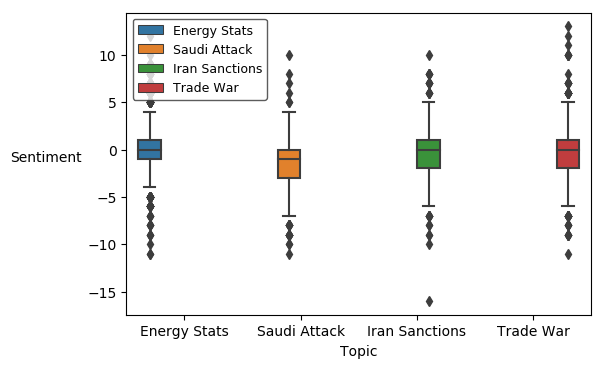

In [111]:
plt.figure(dpi=100)
sns.boxplot(x='Topic', y="sentiment_score", 
                 hue='Topic', data=df_sentiment)
plt.legend(fontsize=9, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.ylabel("Sentiment", rotation='horizontal', ha='right');

#### Spread of sentiment polarity is much greater in Trade War compare to Iran Sanctions

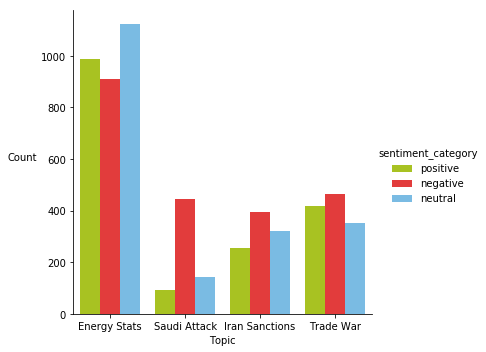

<Figure size 1200x800 with 0 Axes>

In [112]:
sns.catplot(x="Topic", hue="sentiment_category", 
                    data=df_sentiment, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
plt.ylabel("Count", rotation='horizontal', ha='right')
plt.figure(dpi=200);

#### Lets see what were the most negative or positive article

In [113]:
pos_idx = df_sentiment[(df_sentiment.Topic=='Trade War') & \
                       (df_sentiment.sentiment_score >= 11)]
neg_idx = df_sentiment[(df_sentiment.Topic=='Trade War') & \
                       (df_sentiment.sentiment_score < -8)]

In [114]:
pos_idx.index

Int64Index([2158, 4866, 5083], dtype='int64')

In [115]:
neg_idx.index

Int64Index([4030, 4031, 4484, 5069, 5544, 5893], dtype='int64')

In [116]:
#Most positive tweet on trade war
pd.set_option('display.max_colwidth', -1)
print(df_tweets.iloc[pos_idx.index]['text'])

3055      this should be good for greater market positive sign towards trade deal and good for oil price …                                                                                                                          
102392    maybe take a step back from red white amp blue tattoo on your brain amp realize that like the nuke talk with with all its rhetoric of great progress there be chance of us winner take all outcome from trade negotiations
102861    one of the many highlight from be have the opportunity to meet and listen to visionary his thoughts on a china lead global ev inflection be insightful their affordable e suv option will be fascinate to watch tsla      
Name: text, dtype: object


In [117]:
print(df_tweets.iloc[pos_idx.index]['screen_name'])

3055      mlofgran     
102392    YVRWestEndGuy
102861    wrbailey8    
Name: screen_name, dtype: object


In [118]:
#Most negative tweet on trade war
print(df_tweets.iloc[neg_idx.index]['text'])

100932    worse than odd tankers ‘ sabotage ’ smell monkey biz ignite war remember bush dubya invent wmd same johnny of istan nsa babble krap                                                                                                  
100933    worse than odd tankers ‘ sabotage ’ smell monkey biz ignite war remember bush dubya invent wmd vs same johnny of istan nsa babble krap                                                                                               
101555    now this be a laughable example of someone who have no idea of what he be talk about pull bull shit out of his ass                                                                                                                   
102828    close today s oil short for a big fat fuck loss i can t believe that i still miss oil trade like that after years of be so focus god fuck damn it                                                                                    
103975    fear dumb donnie on will of pu

In [119]:
print(df_tweets.iloc[neg_idx.index]['screen_name'])

100932    ormiga       
100933    ormiga       
101555    CashErrthing 
102828    GetupPig     
103975    ormiga       
200894    RobertMacMinn
Name: screen_name, dtype: object


## Predict on New Tweets

In [120]:
new_tweet_1 = '#SaudiAramcos #Sempra deal could be just the first US #LNG investment for #SaudiArabias state oil and gas giant. @TellurianLNG tells @SPGlobalPlatts that it continues to have talks with @Saudi_Aramco over its Driftwood LNG project #OOTT 👇 https://t.co/Xbeog7LU1f'
new_tweet_2 = "Uncertainty over the future of shale gas in China is a concern for a gas-hungry country ever more dependent on imports #oilgas #OOTT #OOTT #oilgas #ONGT https://t.co/CSotTI7lBF"
new_tweet_3 = 'maybe take a step back from red white amp blue tattoo on your brain amp realize that like the nuke talk with with all its rhetoric of great progress there be chance of us winner take all outcome from trade negotiations'

In [121]:
def process_tweet(tweet):
    print("Unprocessed Tweet:" , tweet)
    #tweet = tweet.replace('#','')
    clean_tweet = pre_clean(tweet)
    clean_tweet = punc_lower(clean_tweet)
    clean_tweet = alphanumeric(clean_tweet)
    print("Clean Tweet:", clean_tweet)
    clean_tweet = token_lem(clean_tweet)
    clean_tweet = pd.Series(' '.join(str(x) for x in clean_tweet))
    clean_tweet = pd.Series(clean_tweet)
    tweet_vect = vectorizer.transform(clean_tweet)
    tweet_topic = lsa.transform(tweet_vect)
    df_new_tweet = pd.DataFrame(tweet_topic.round(2), columns = ["Saudi_News","Energy_Stats","China_Trade","Iran_Sanctions"])
    df_new_tweet.index.name = 'tweet'
    df_new_tweet['Topic'] = df_new_tweet.idxmax(axis=1)
    df_new_tweet['sentiment'] = af.score(tweet)
    #print("Predicted Topic: ", df_new_tweet.Topic[0])
    #print("Sentiment Score: ", df_new_tweet.sentiment[0])
    return print(df_new_tweet.iloc[-1], "\n")

In [122]:
process_tweet(new_tweet_3)

Unprocessed Tweet: maybe take a step back from red white amp blue tattoo on your brain amp realize that like the nuke talk with with all its rhetoric of great progress there be chance of us winner take all outcome from trade negotiations
Clean Tweet: maybe take a step back from red white amp blue tattoo on your brain amp realize that like the nuke talk with with all its rhetoric of great progress there be chance of us winner take all outcome from trade negotiations
Saudi_News        0.17        
Energy_Stats      0.46        
China_Trade      -0.74        
Iran_Sanctions    0.02        
Topic             Energy_Stats
sentiment         13          
Name: 0, dtype: object 



## Test on Streaming Tweets

In [123]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [124]:
import twitter_credentials

In [125]:
auth = tweepy.OAuthHandler(twitter_credentials.consumer_key,twitter_credentials.consumer_secret)
auth.set_access_token(twitter_credentials.access_token,twitter_credentials.access_secret)

api = tweepy.API(auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [126]:
from tweepy import Stream
from tweepy.streaming import StreamListener
from IPython import display
from collections import deque
import json

class MyListener(StreamListener):
    def __init__(self):
        super().__init__()
        self.list_of_tweets = deque([], maxlen=5)
        self.test = None
    
    def on_data(self, data):
        tweet_data = json.loads(data)
        try: tweet_text = tweet_data['retweeted_status']['extended_tweet']['full_text']
        except: 
            # Try for extended text of an original tweet, if RT'd (REST API)
            try: tweet_text = tweet_data['retweeted_status']['full_text']
            except:
                # Try for extended text of an original tweet (streamer)
                try: tweet_text = tweet_data['extended_tweet']['full_text']
                except:
                    # Try for extended text of an original tweet (REST API)
                    try: tweet_text = tweet_data['full_text']
                    except:
                        # Try for basic text of original tweet if RT'd 
                        try: tweet_text = tweet_data['retweeted_status']['text']
                        except:
                            # Try for basic text of an original tweet
                            try: tweet_text = tweet_data['text']
                            except: 
                                # Nothing left to check for
                                tweet_text = ''
        # twet_text = tweet_data['full_text']
        #tweet_text = json.loads(data)['text']
        self.list_of_tweets.append(tweet_text)
        self.print_list_of_tweets()
        #self.collections.insert_one(tweet_text)
    
    def on_error(self, status):
        print(status)

    def print_list_of_tweets(self):
        display.clear_output(wait=True)
        for index, tweet_text in enumerate(self.list_of_tweets):
            m='{}. {}'.format(index, tweet_text)
            process_tweet(m)
            
twitter_stream = Stream(auth, MyListener(), tweet_mode='extended')
twitter_stream.filter(track=['#OOTT'])

Unprocessed Tweet: 0. @OilyticsData Is demand for gasoline at an all time high for this week compared to the 5 year average? #OOTT
Clean Tweet:   is demand for gasoline at an all time high for this week compared to the year average 
Saudi_News        0.21        
Energy_Stats      0.59        
China_Trade       0.19        
Iran_Sanctions   -0.36        
Topic             Energy_Stats
sentiment        -1           
Name: 0, dtype: object 

Unprocessed Tweet: 1. US crude &amp; oil product exports soared to record 9.38mbpd last week -EIA #OOTT
Clean Tweet:   us crude  amp  oil product erts soared to record   last week  eia
Saudi_News        0.09        
Energy_Stats      0.19        
China_Trade       0.09        
Iran_Sanctions   -0.12        
Topic             Energy_Stats
sentiment        -1           
Name: 0, dtype: object 

Unprocessed Tweet: 2. Mayo ha sido el 2º mejor mes del año en producción de petróleo en Colombia 🇨🇴, muy cerca de los 900 mil 🛢 por día, se mantiene por encima 

KeyboardInterrupt: 

In [ ]:
from pprint import pprint

In [517]:
pprint(twitter_stream.listener.test)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed May 22 21:11:44 +0000 2019',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 4814182687,
                                 'id_str': '4814182687',
                                 'indices': [3, 17],
                                 'name': 'Erik Townsend 🛢️',
                                 'screen_name': 'ErikSTownsend'},
                                {'id': 775175696645623808,
                                 'id_str': '775175696645623808',
                                 'indices': [54, 66],
                                 'name': 'Anas Alhajji',
                                 'screen_name': 'anasalhajji'},
                                {'id': 25442816,
                                 'id_str': '25442816',
                                 'indices': [67, 78],
                                 'name': 'Patricia A Hemsworth',
           